In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

csv_file_path = "C:\sample_py/csvfile/20230430.csv"
먼지 = pd.read_csv(csv_file_path, encoding='CP949')
먼지.head()

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온,습도,재비산먼지 평균농도,오염범례
0,2023-04-10,12:26,서울,강동구,풍산로(북→남),서울특별시 강동구 강일동 36-17 도,서울특별시 강동구 강일동 472-1전,17,31,16,매우좋음
1,2023-04-10,12:36,서울,강동구,상일로(북→남),서울특별시 강동구 고덕동 140-1 도,서울특별시 강동구 상일동 359-3 도,18,31,14,매우좋음
2,2023-04-10,12:41,서울,강동구,천호대로(동→서),서울특별시 강동구 상일동 394-4도,서울특별시 강동구 천호동 527-3천,18,31,10,매우좋음
3,2023-04-10,13:02,서울,강동구,성내로(서→동),서울특별시 강동구 성내동 62-1도,서울특별시 강동구 성내동 435도,19,31,10,매우좋음
4,2023-04-10,13:12,서울,강동구,강동대로(동→서),둔촌동 229-2임,성내동 459-10대,20,31,9,매우좋음


In [4]:
print('전체 데이터 건수 : ', len(먼지))
print('컬럼별 결측치 개수')
len(먼지) - 먼지.count()

전체 데이터 건수 :  838
컬럼별 결측치 개수


측정일자          0
측정시간          1
지역            0
지역명           0
도로명           0
시작점           0
종점            0
기온            0
습도            0
재비산먼지 평균농도    0
오염범례          0
dtype: int64

In [5]:
먼지.isnull()

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온,습도,재비산먼지 평균농도,오염범례
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
833,False,False,False,False,False,False,False,False,False,False,False
834,False,False,False,False,False,False,False,False,False,False,False
835,False,False,False,False,False,False,False,False,False,False,False
836,False,False,False,False,False,False,False,False,False,False,False


In [6]:
먼지[먼지.isnull().any(axis=1)]

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온,습도,재비산먼지 평균농도,오염범례
161,2023-04-14,NaN,경기,파주시,돈유3로(서→동),경기도 파주시 문산읍 선유리 1381 도,경기도 파주시 문산읍 선유리 1373-14 장,14,75,391,매우나쁨


In [7]:
먼지.loc[[160,161,162]]

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온,습도,재비산먼지 평균농도,오염범례
160,2023-04-14,12:44,경기,파주시,평화로(서→동),경기도 파주시 탄현면 성동리 625도,경기도 파주시 금촌동 962-22도,19,70,29,매우좋음
161,2023-04-14,NaN,경기,파주시,돈유3로(서→동),경기도 파주시 문산읍 선유리 1381 도,경기도 파주시 문산읍 선유리 1373-14 장,14,75,391,매우나쁨
162,2023-04-14,10:11,경기,시흥시,계수로(동→서),경기도 시흥시 과림동 79-4도,경기도 시흥시 계수동 747-19도,17,55,23,매우좋음


In [8]:
먼지[먼지.duplicated()]

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온,습도,재비산먼지 평균농도,오염범례


In [9]:
강동구 = 먼지[(먼지['지역명']=='강동구')]
강동구

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온,습도,재비산먼지 평균농도,오염범례
0,2023-04-10,12:26,서울,강동구,풍산로(북→남),서울특별시 강동구 강일동 36-17 도,서울특별시 강동구 강일동 472-1전,17,31,16,매우좋음
1,2023-04-10,12:36,서울,강동구,상일로(북→남),서울특별시 강동구 고덕동 140-1 도,서울특별시 강동구 상일동 359-3 도,18,31,14,매우좋음
2,2023-04-10,12:41,서울,강동구,천호대로(동→서),서울특별시 강동구 상일동 394-4도,서울특별시 강동구 천호동 527-3천,18,31,10,매우좋음
3,2023-04-10,13:02,서울,강동구,성내로(서→동),서울특별시 강동구 성내동 62-1도,서울특별시 강동구 성내동 435도,19,31,10,매우좋음
4,2023-04-10,13:12,서울,강동구,강동대로(동→서),둔촌동 229-2임,성내동 459-10대,20,31,9,매우좋음
5,2023-04-10,13:18,서울,강동구,올림픽로(남→북),서울특별시 강동구 성내동 472도,서울특별시 강동구 암사동 98-20도,19,32,48,매우좋음
6,2023-04-10,13:35,서울,강동구,양재대로(북→남),서울특별시 강동구 고덕동 469도,서울특별시 강동구 둔촌동 522-13 도,20,31,12,매우좋음
7,2023-04-10,13:56,서울,강동구,동남로(남→북),서울특별시 강동구 둔촌동 229-2 도,서울특별시 강동구 고덕동 302-3 도,20,32,10,매우좋음
8,2023-04-10,14:18,서울,강동구,고덕로(동→서),서울특별시 강동구 강일동 472-1전,서울특별시 강동구 암사동 608-62도,20,32,11,매우좋음
9,2023-04-10,14:42,서울,강동구,천중로(서→동),서울특별시 강동구 천호동 256-4도,서울특별시 강동구 길동 12-5도,20,31,38,매우좋음


In [10]:
강동구['도로명']

0     풍산로(북→남)
1     상일로(북→남)
2    천호대로(동→서)
3     성내로(서→동)
4    강동대로(동→서)
5    올림픽로(남→북)
6    양재대로(북→남)
7     동남로(남→북)
8     고덕로(동→서)
9     천중로(서→동)
Name: 도로명, dtype: object

In [11]:
np.mean(강동구['기온'])
np.mean(강동구['습도'])
np.mean(강동구['재비산먼지 평균농도'])

17.8

In [12]:
먼지[(먼지['재비산먼지 평균농도'] > 50)]

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온,습도,재비산먼지 평균농도,오염범례
16,2023-04-10,11:43,경기,김포시,돌문로(서→동),경기도 김포시 사우동 186-20도,경기도 김포시 사우동 838-45도,16,41,436,매우나쁨
26,2023-04-13,09:35,인천,서구,단봉로(동→서),인천광역시 서구 왕길동 657도,인천광역시 서구 오류동 332-1 답,12,36,71,좋음
28,2023-04-13,09:55,인천,서구,마중로(남→북),인천광역시 서구 오류동 1668 도,인천광역시 서구 오류동 1706 도,12,41,117,보통
29,2023-04-13,10:17,인천,서구,원당대로(서→동),인천광역시 서구 오류동 1114 답,인천광역시 서구 원당동 8-2답,14,33,130,보통
33,2023-04-13,12:49,인천,서구,청마로(서→동),인천광역시 서구 당하동 1116도,인천광역시 서구 당하동 1116도,16,18,98,좋음
...,...,...,...,...,...,...,...,...,...,...,...
814,2023-04-28,10:00,인천,중구,월미로(동→서),인천광역시 중구 선린동 58-1 도,인천광역시 중구 북성동1가 119도,15,64,81,좋음
820,2023-04-28,11:28,인천,중구,축항대로290번길(남→북),인천광역시 중구 신흥동3가 79도,인천광역시 중구 신흥동3가 35도,18,51,135,보통
822,2023-04-28,11:42,인천,중구,연안부두로(북→남),인천광역시 중구 항동7가 27-19 도,인천광역시 중구 항동7가 72 도,17,53,54,좋음
824,2023-04-28,12:01,인천,중구,축항대로86번길(북→남),인천광역시 중구 항동7가 27-19 도,인천광역시 중구 항동7가 72 도,18,49,51,좋음


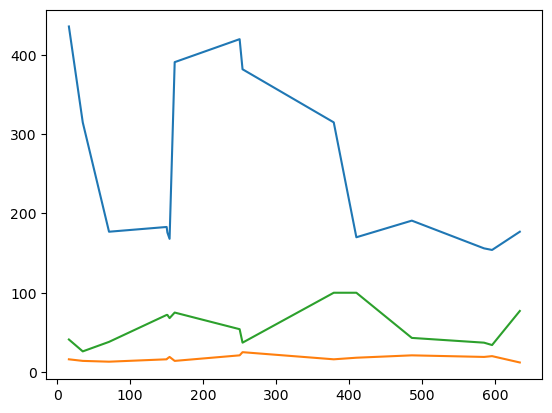

<Figure size 1000x1000 with 0 Axes>

In [13]:

plt.plot(먼지[(먼지['재비산먼지 평균농도'] >150)]['재비산먼지 평균농도'])
plt.plot(먼지[(먼지['재비산먼지 평균농도'] > 150)]['기온'])
plt.plot(먼지[(먼지['재비산먼지 평균농도'] > 150)]['습도'])
plt.figure(figsize=(10, 10))
plt.show()

In [14]:
먼지[(먼지['재비산먼지 평균농도'] < 80)]['재비산먼지 평균농도']

0      16
1      14
2      10
3      10
4       9
       ..
833    48
834    59
835    15
836    38
837     9
Name: 재비산먼지 평균농도, Length: 774, dtype: int64

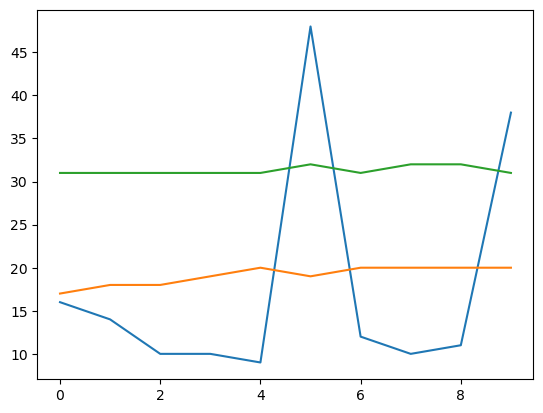

<Figure size 1000x1000 with 0 Axes>

In [15]:

plt.plot(강동구['재비산먼지 평균농도'])
plt.plot(강동구['기온'])
plt.plot(강동구['습도'])
plt.figure(figsize=(10, 10))
plt.show()

In [16]:
먼지[먼지['지역명'].duplicated()]

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온,습도,재비산먼지 평균농도,오염범례
1,2023-04-10,12:36,서울,강동구,상일로(북→남),서울특별시 강동구 고덕동 140-1 도,서울특별시 강동구 상일동 359-3 도,18,31,14,매우좋음
2,2023-04-10,12:41,서울,강동구,천호대로(동→서),서울특별시 강동구 상일동 394-4도,서울특별시 강동구 천호동 527-3천,18,31,10,매우좋음
3,2023-04-10,13:02,서울,강동구,성내로(서→동),서울특별시 강동구 성내동 62-1도,서울특별시 강동구 성내동 435도,19,31,10,매우좋음
4,2023-04-10,13:12,서울,강동구,강동대로(동→서),둔촌동 229-2임,성내동 459-10대,20,31,9,매우좋음
5,2023-04-10,13:18,서울,강동구,올림픽로(남→북),서울특별시 강동구 성내동 472도,서울특별시 강동구 암사동 98-20도,19,32,48,매우좋음
...,...,...,...,...,...,...,...,...,...,...,...
833,2023-04-28,14:33,인천,중구,하늘달빛로(동→서),인천광역시 중구 중산동 2002도,인천광역시 중구 중산동 1975도,19,50,48,매우좋음
834,2023-04-28,14:40,인천,중구,하늘별빛로(서→동),인천광역시 중구 중산동 1977도,인천광역시 중구 중산동 2002도,19,49,59,좋음
835,2023-04-28,14:47,인천,중구,은하수로(동→서),인천광역시 중구 중산동 1984-3도,인천광역시 중구 중산동 1992도,19,46,15,매우좋음
836,2023-04-28,15:00,인천,중구,넙디로(동→서),인천광역시 중구 운남동 1768도,인천광역시 중구 운서동 3236도,18,50,38,매우좋음


In [17]:
groups = 먼지.groupby('지역명', as_index=False)
groups

In [18]:
gro_avg = groups.mean('기온', '습도', '재비산먼지 평균농도') #평균
gro_avg

,지역명,기온,습도,재비산먼지 평균농도
0,강동구,19.100000,31.300000,17.800000
1,계양구,16.692308,86.076923,5.000000
2,고양시 덕양구,19.958333,44.208333,30.375000
3,고양시 일산동구,19.391304,84.434783,45.434783
4,고양시 일산서구,21.250000,72.550000,24.150000
5,과천시,24.166667,40.333333,56.833333
6,광명시,19.466667,43.933333,39.466667
7,광진구,22.200000,35.200000,22.200000
8,구로구,18.222222,100.000000,40.055556
9,구리시,18.800000,77.200000,21.400000


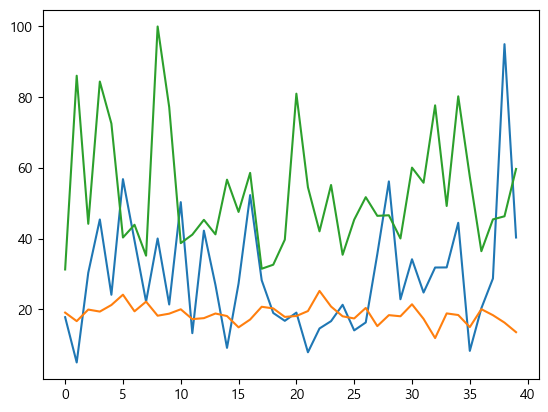

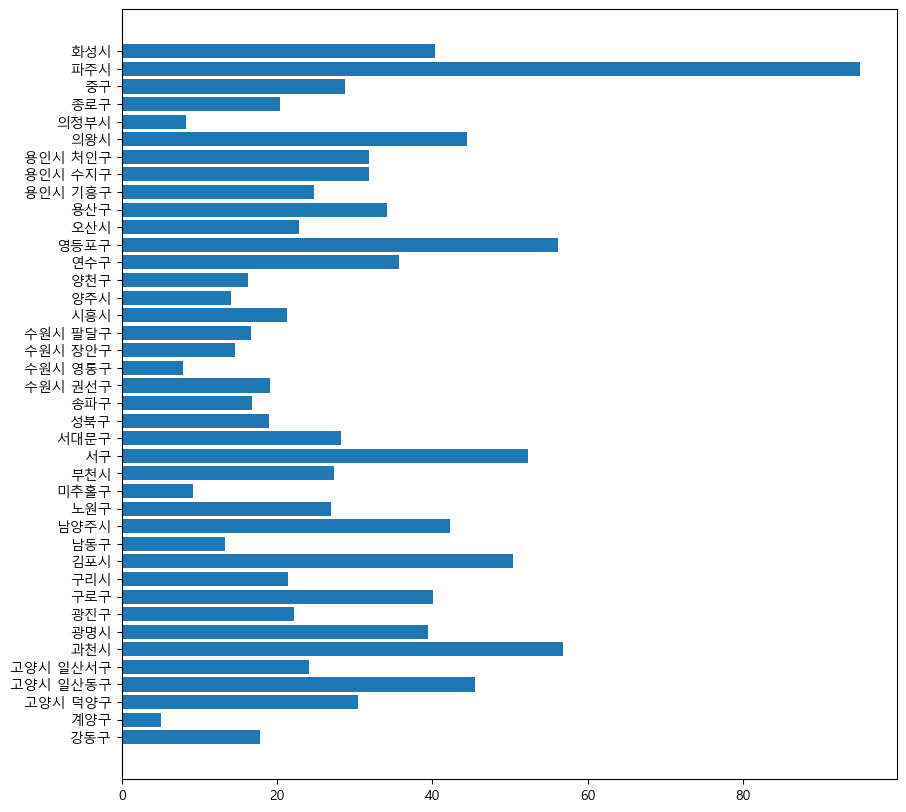

In [19]:
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.plot(gro_avg['재비산먼지 평균농도'])
plt.plot(gro_avg['기온'])
plt.plot(gro_avg['습도'])
plt.figure(figsize=(10, 10))
plt.barh(gro_avg['지역명'], gro_avg['재비산먼지 평균농도'])
plt.show()